In [392]:
# you may ignore this cell
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle          

In [393]:
import seaborn as sns

In [394]:
df = pd.read_csv('heloc_dataset_v1.csv')

In [395]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [397]:
df.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
ExternalRiskEstimate,1.000000,0.477272,0.326204,0.584799,0.473782,0.684661,0.741375,0.895690,0.091850,0.908919,...,0.370047,0.342029,0.607409,0.611987,0.040390,0.159683,0.508414,0.462768,0.514849,0.402654
MSinceOldestTradeOpen,0.477272,1.000000,0.219878,0.725988,0.414862,0.370034,0.380408,0.400114,0.109667,0.386440,...,0.077179,0.213739,0.267244,0.271127,0.026828,0.032821,0.389226,0.206814,0.345081,0.127794
MSinceMostRecentTradeOpen,0.326204,0.219878,1.000000,0.493960,-0.028660,0.294822,0.304760,0.240334,0.019798,0.293119,...,0.152263,0.094622,0.140926,0.142192,0.028897,-0.156797,0.064387,-0.020523,0.087324,0.178142
AverageMInFile,0.584799,0.725988,0.493960,1.000000,0.359832,0.473571,0.480983,0.451750,0.126157,0.466590,...,0.113136,0.199196,0.294841,0.299182,0.028779,-0.047407,0.375460,0.163037,0.354238,0.188197
NumSatisfactoryTrades,0.473782,0.414862,-0.028660,0.359832,1.000000,0.420207,0.447632,0.577202,0.123848,0.479906,...,0.170103,0.233521,0.458462,0.460724,0.149447,0.297483,0.674215,0.542805,0.564977,0.191318
NumTrades60Ever2DerogPubRec,0.684661,0.370034,0.294822,0.473571,0.420207,1.000000,0.975480,0.675845,0.273697,0.708507,...,0.485495,0.285988,0.677402,0.681080,0.326146,0.252372,0.570133,0.533840,0.545074,0.589809
NumTrades90Ever2DerogPubRec,0.741375,0.380408,0.304760,0.480983,0.447632,0.975480,1.000000,0.751725,0.247193,0.762342,...,0.493924,0.301853,0.703001,0.706904,0.320792,0.258830,0.591946,0.547489,0.567947,0.600332
PercentTradesNeverDelq,0.895690,0.400114,0.240334,0.451750,0.577202,0.675845,0.751725,1.000000,0.046771,0.907249,...,0.400135,0.333832,0.682192,0.686419,0.237838,0.264564,0.642399,0.549565,0.631757,0.502780
MSinceMostRecentDelq,0.091850,0.109667,0.019798,0.126157,0.123848,0.273697,0.247193,0.046771,1.000000,0.104693,...,0.138468,0.067222,0.151502,0.152159,0.126058,0.087071,0.142735,0.142514,0.117593,0.156383
MaxDelq2PublicRecLast12M,0.908919,0.386440,0.293119,0.466590,0.479906,0.708507,0.762342,0.907249,0.104693,1.000000,...,0.424433,0.326017,0.679375,0.683039,0.246579,0.229724,0.586801,0.518741,0.587172,0.529812


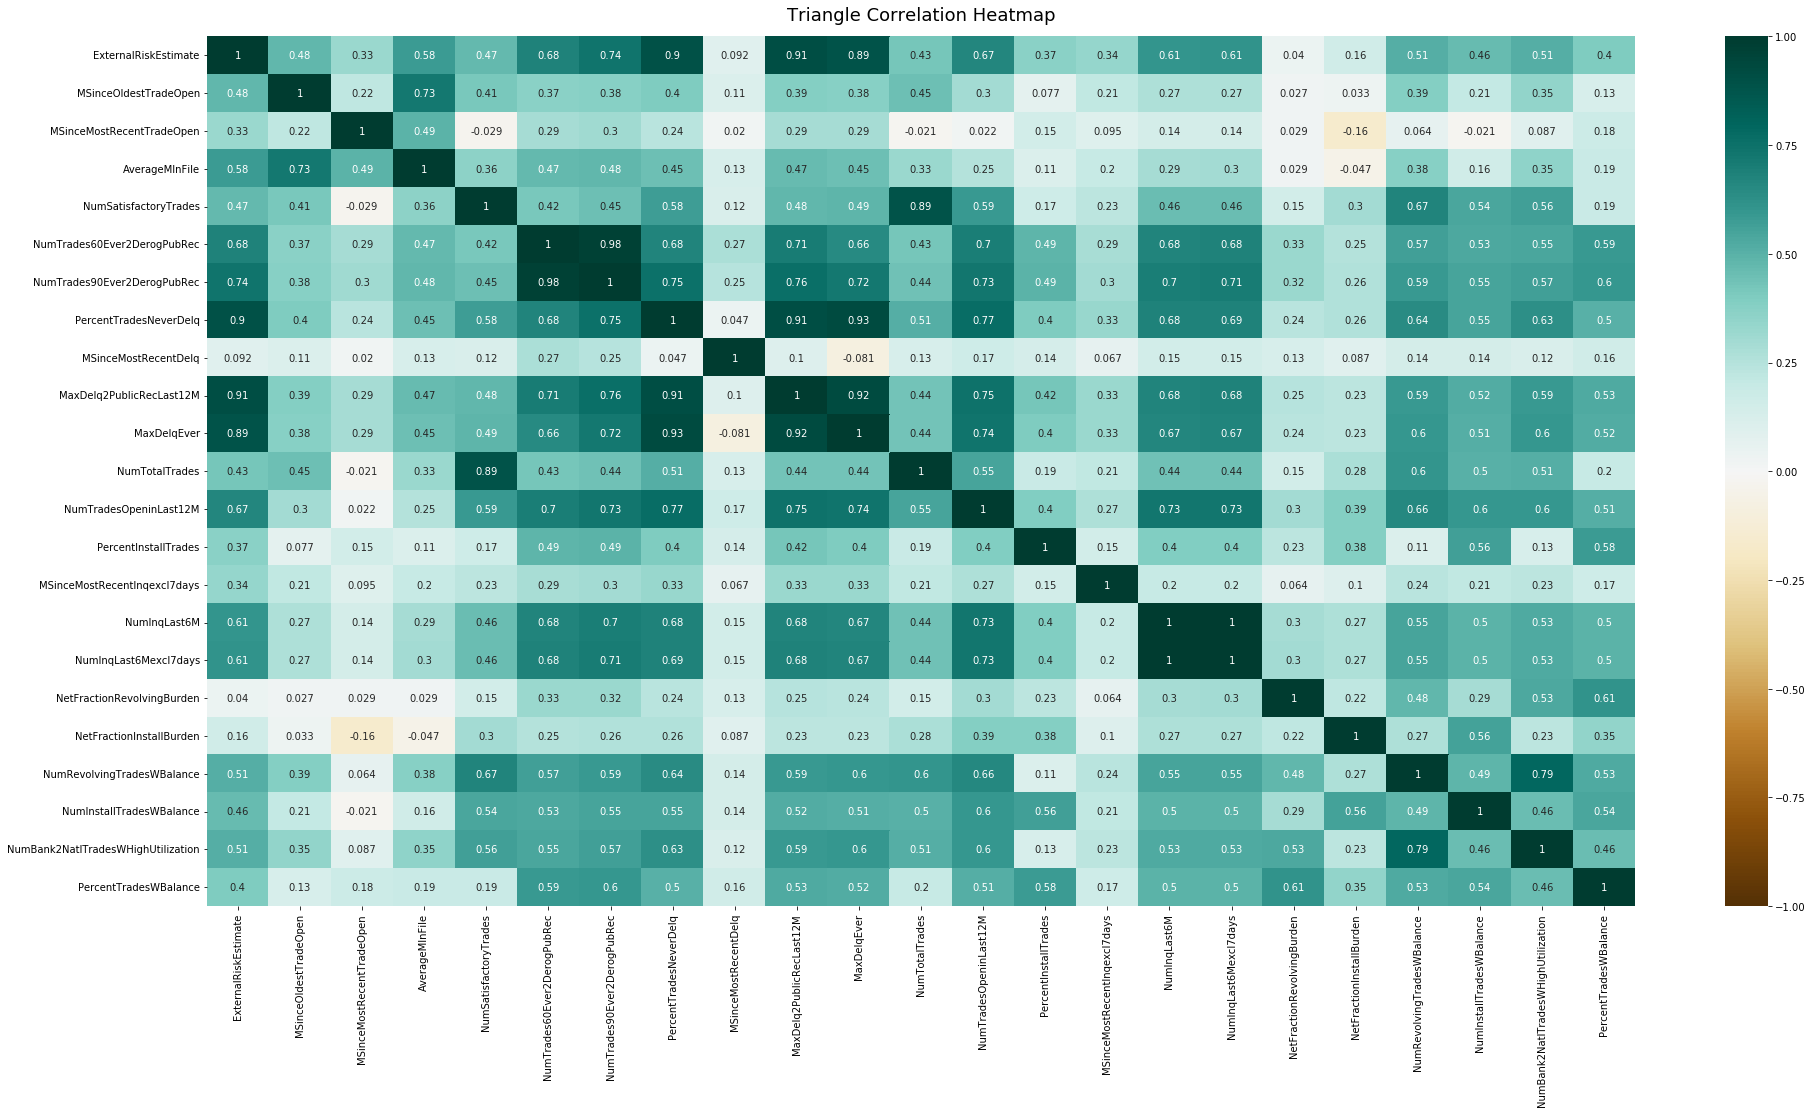

In [398]:
# sns.heatmap(df.corr())
plt.figure(figsize=(32, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [399]:
# 单独的： MSinceMostRecentDelq， MSinceMostRecentTradeOpen

# 紧密正相关： PercentTradeNeverDelq, MaxDelq2PublicRecLast12M, MaxDelqEver
            # NumTatalTrades, NumSatisfactoryTrades == 满意率 

# 一模一样（1）： NuminqLast6M = NuminqLastMexcl7days 
                # NumTrades60EverDerogPubRec = NumTrades90EverDerogPubRec

In [400]:
n_rows = df.shape[0]
n_cols = df.shape[1]
col_names = list(df.columns)
row_indexes = list(df.index)

In [401]:
cols_numeric = []
cols_string = []
###
### YOUR CODE HERE
###

for colname in col_names:
    if df[colname].dtypes == 'object':
        cols_string.append(colname)
    if df[colname].dtypes in ['int64', 'float64']:
        cols_numeric.append(colname)

In [402]:
df_missing_ExternalRiskEstimate = df.loc[df["ExternalRiskEstimate"] == -9,:]
n_rows_with_missing_ExternalRiskEstimate = df_missing_ExternalRiskEstimate.shape[0]

n_rows_all_numeric_missing = (df_missing_ExternalRiskEstimate.loc[:,cols_numeric]==-9).sum(axis=0).min()

df_without_missing_rows = df.loc[df.index[(df.loc[:,cols_numeric]==-9).sum(axis=1) != 23],:]

### Feature Engineering

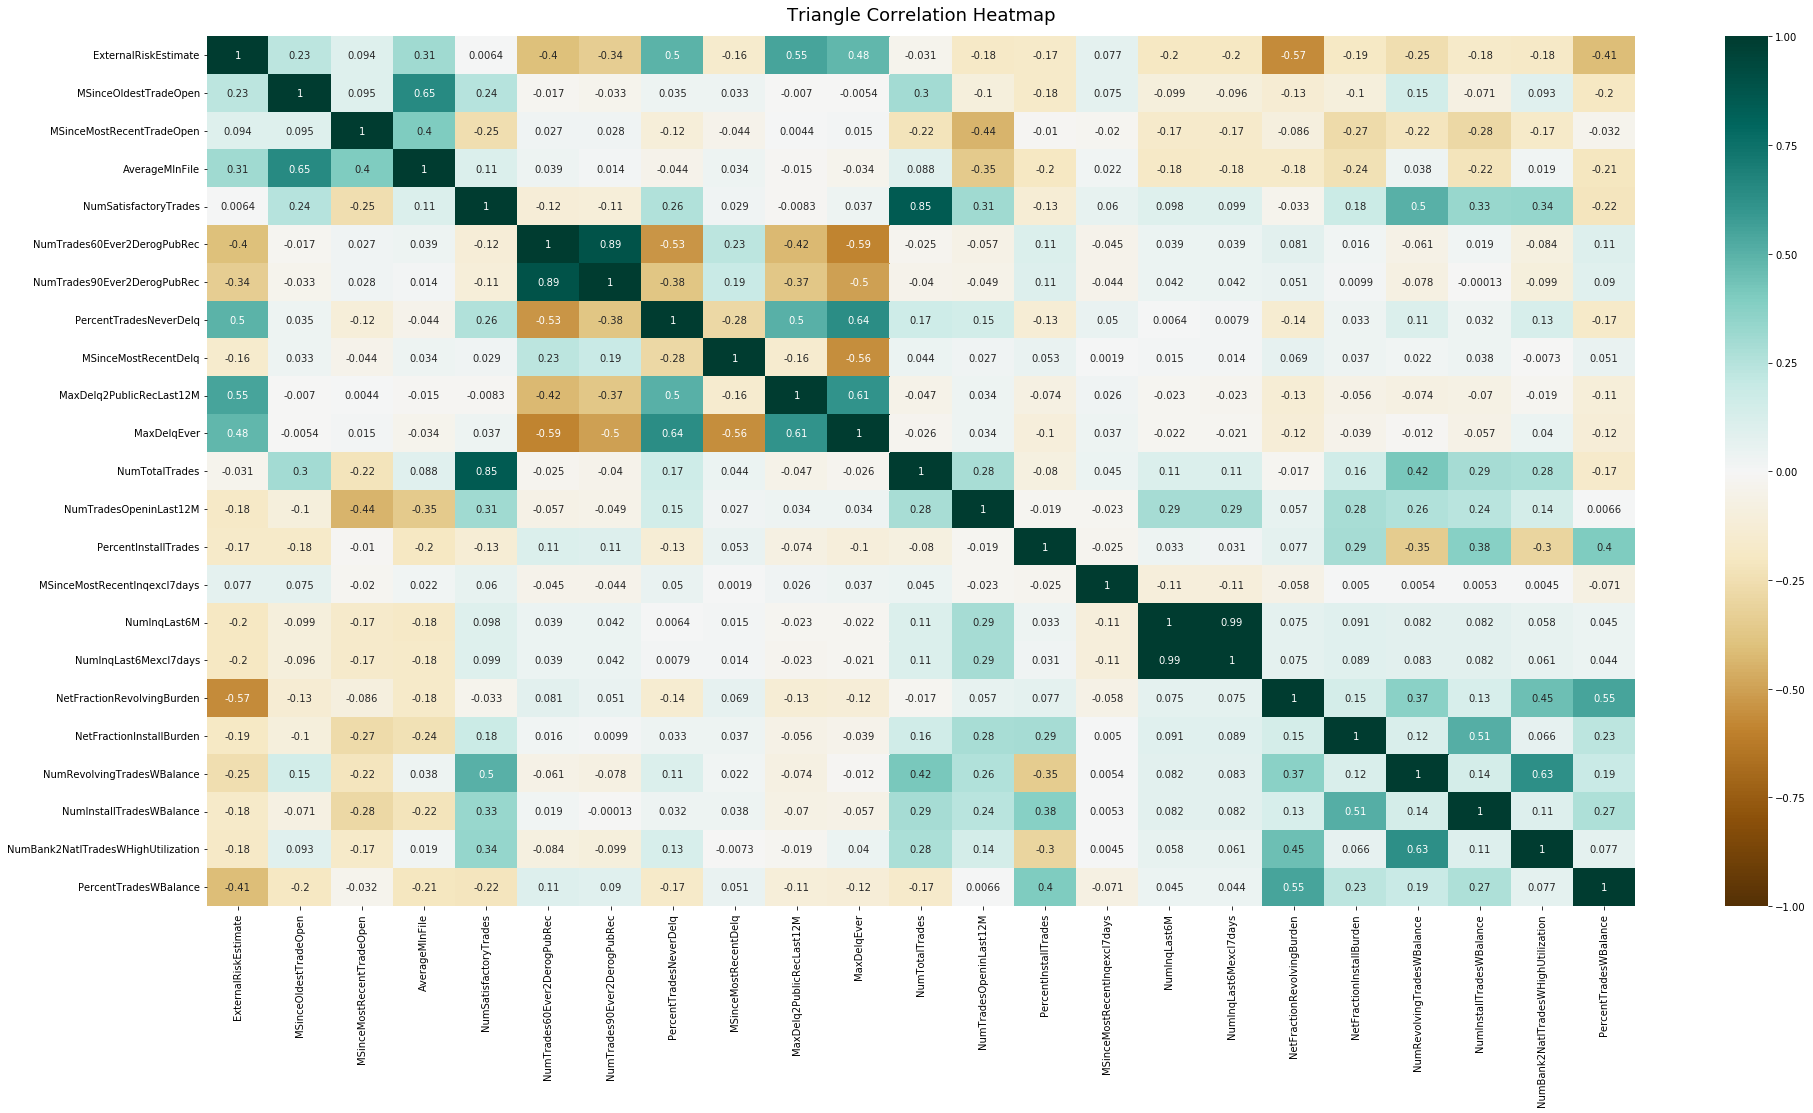

In [403]:
# sns.heatmap(df.corr())
plt.figure(figsize=(32, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_without_missing_rows.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_without_missing_rows.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [404]:
temp_good = df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Good', cols_numeric].mean()
temp_bad = df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Bad', cols_numeric].mean()

df_avg_feature_value_per_group = pd.concat([temp_bad, temp_good], axis=1)

df_avg_feature_value_per_group.index.name = 'RiskPerformance'
df_avg_feature_value_per_group.columns = ['Bad', 'Good']
df_avg_feature_value_per_group['Diff'] = df_avg_feature_value_per_group['Bad']/df_avg_feature_value_per_group['Good']
df_avg_feature_value_per_group['Significant_bad'] = df_avg_feature_value_per_group['Diff']>1.14
df_avg_feature_value_per_group['Significant_good'] = df_avg_feature_value_per_group['Diff']<0.87
df_avg_feature_value_per_group['Significant'] = df_avg_feature_value_per_group['Significant_bad'] + df_avg_feature_value_per_group['Significant_good']

C:\Users\13793\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [405]:
df_avg_feature_value_per_group.loc[:,['Bad', 'Good', 'Significant']]

,Bad,Good,Significant
RiskPerformance,,,
ExternalRiskEstimate,67.574961,76.754593,False
MSinceOldestTradeOpen,175.698598,217.425132,True
MSinceMostRecentTradeOpen,9.011682,10.214150,False
AverageMInFile,70.801791,87.429989,True
NumSatisfactoryTrades,19.587812,22.785005,True
NumTrades60Ever2DerogPubRec,0.783294,0.362408,True
NumTrades90Ever2DerogPubRec,0.518692,0.239493,True
PercentTradesNeverDelq,89.450935,95.515312,False
MSinceMostRecentDelq,8.943731,6.353749,True


### Categorical Features
pd.Categorical

In [406]:
# df_without_missing_rows['MaxDelqEver'] = pd.Categorical(df_without_missing_rows['MaxDelqEver'])

In [407]:
## remove categorical feature from cols_numeric
# cols_numeric.remove('MaxDelqEver')

In [408]:
df_without_missing_rows.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [409]:
df_without_missing_rows['SatisfactoryTradesRate'] = df_without_missing_rows['NumSatisfactoryTrades']/df_without_missing_rows['NumTotalTrades']
# df_without_missing_rows['SatisfactoryTradesRate'] = np.where(df_without_missing_rows['SatisfactoryTradesRate']>= 0 , df_without_missing_rows['SatisfactoryTradesRate'], 0)
df_without_missing_rows['SatisfactoryTradesRate'] = np.where(df_without_missing_rows['SatisfactoryTradesRate']<=1 , df_without_missing_rows['SatisfactoryTradesRate'], 0)

In [410]:
df_without_missing_rows.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden                int64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

In [411]:
cols_numeric.append('SatisfactoryTradesRate')

In [412]:

temp_good = df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Good', cols_numeric].mean()
temp_bad = df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Bad', cols_numeric].mean()

df_avg_feature_value_per_group = pd.concat([temp_bad, temp_good], axis=1)

df_avg_feature_value_per_group.index.name = 'RiskPerformance'
df_avg_feature_value_per_group.columns = ['Bad', 'Good']
df_avg_feature_value_per_group['Diff'] = df_avg_feature_value_per_group['Bad']/df_avg_feature_value_per_group['Good']
df_avg_feature_value_per_group['Significant_bad'] = df_avg_feature_value_per_group['Diff']>1.14
df_avg_feature_value_per_group['Significant_good'] = df_avg_feature_value_per_group['Diff']<0.87
df_avg_feature_value_per_group['Significant'] = df_avg_feature_value_per_group['Significant_bad'] + df_avg_feature_value_per_group['Significant_good']
df_avg_feature_value_per_group.loc[:,['Bad', 'Good', 'Significant']]


C:\Users\13793\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,Bad,Good,Significant
RiskPerformance,,,
ExternalRiskEstimate,67.574961,76.754593,False
MSinceOldestTradeOpen,175.698598,217.425132,True
MSinceMostRecentTradeOpen,9.011682,10.214150,False
AverageMInFile,70.801791,87.429989,True
NumSatisfactoryTrades,19.587812,22.785005,True
NumTrades60Ever2DerogPubRec,0.783294,0.362408,True
NumTrades90Ever2DerogPubRec,0.518692,0.239493,True
PercentTradesNeverDelq,89.450935,95.515312,False
MSinceMostRecentDelq,8.943731,6.353749,True


In [413]:
temp_bad

RiskPerformance
ExternalRiskEstimate                   67.574961
MSinceOldestTradeOpen                 175.698598
MSinceMostRecentTradeOpen               9.011682
AverageMInFile                         70.801791
NumSatisfactoryTrades                  19.587812
NumTrades60Ever2DerogPubRec             0.783294
NumTrades90Ever2DerogPubRec             0.518692
PercentTradesNeverDelq                 89.450935
MSinceMostRecentDelq                    8.943731
MaxDelq2PublicRecLast12M                5.384151
MaxDelqEver                             5.989681
NumTotalTrades                         21.377531
NumTradesOpeninLast12M                  1.999805
PercentInstallTrades                   37.039136
MSinceMostRecentInqexcl7days           -0.460280
NumInqLast6M                            1.750584
NumInqLast6Mexcl7days                   1.674844
NetFractionRevolvingBurden             43.302181
NetFractionInstallBurden               45.769665
NumRevolvingTradesWBalance              4.176207
NumI

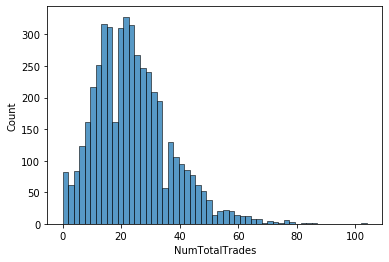

In [414]:
sns.histplot(df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Good', 'NumTotalTrades'])

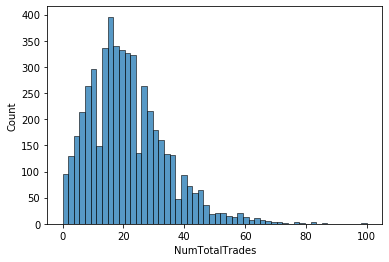

In [415]:
sns.histplot(df_without_missing_rows.loc[df_without_missing_rows['RiskPerformance'] == 'Bad', 'NumTotalTrades'])

### Models

In [416]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [417]:
df = df_without_missing_rows

In [418]:
X = df.iloc[:,1:25]
Y = df['RiskPerformance'].map(dict(Bad = 1, Good = 0))

In [419]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: RiskPerformance, dtype: int64

In [420]:
print(X.shape, Y.shape)

(9871, 24) (9871,)


In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1234)
Y_train, Y_test  = train_test_split(Y, test_size=0.2, random_state=1234)



In [422]:
df_train = pd.concat([X_train, Y_train], axis = 1)

In [423]:
means = df_train.groupby(['ExternalRiskEstimate']).mean()['RiskPerformance']

In [424]:
df_train.groupby(['ExternalRiskEstimate']).mean()

,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,...,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SatisfactoryTradesRate,RiskPerformance
ExternalRiskEstimate,,,,,,,,,,,,,,,,,,,,,
-9,157.250000,93.375000,130.750000,6.000000,1.375000,1.375000,91.750000,-0.125000,5.875000,6.750000,...,1.125000,1.125000,-1.125000,15.125000,-5.125000,-5.750000,-5.875000,4.000000,0.908004,0.875000
34,157.000000,31.000000,91.000000,1.000000,8.000000,7.000000,33.000000,1.000000,0.000000,2.000000,...,4.000000,4.000000,100.000000,-8.000000,1.000000,-8.000000,1.000000,100.000000,0.090909,0.000000
36,377.000000,1.000000,113.000000,10.000000,7.000000,2.000000,63.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,59.000000,78.000000,8.000000,3.000000,2.000000,85.000000,0.588235,1.000000
37,263.000000,4.000000,80.000000,26.000000,1.000000,1.000000,78.000000,0.000000,2.000000,4.000000,...,2.000000,2.000000,71.000000,44.000000,7.000000,2.000000,2.000000,69.000000,0.962963,1.000000
39,80.000000,11.000000,11.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,...,4.000000,4.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000,1.000000
40,171.500000,2.000000,82.000000,8.000000,12.500000,8.500000,38.500000,1.500000,0.000000,2.000000,...,6.500000,6.500000,89.000000,44.500000,6.000000,1.500000,2.000000,93.500000,0.378517,1.000000
41,169.000000,4.000000,85.000000,33.000000,4.000000,0.000000,74.000000,0.000000,3.000000,5.000000,...,1.000000,1.000000,70.000000,32.000000,10.000000,4.000000,7.000000,88.000000,0.846154,1.000000
43,154.400000,7.400000,73.800000,16.600000,2.800000,1.800000,68.400000,1.400000,3.400000,3.800000,...,1.600000,1.600000,68.400000,50.800000,5.400000,1.000000,1.600000,88.200000,0.565909,0.600000
44,25.500000,21.000000,78.500000,37.500000,3.000000,1.500000,74.500000,1.500000,1.000000,4.500000,...,3.000000,3.000000,67.500000,35.500000,11.000000,4.000000,2.000000,78.000000,0.843685,1.000000


In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1234)
Y_train, Y_test  = train_test_split(Y, test_size=0.2, random_state=1234)

In [426]:
print(X_train.shape, Y_train.shape)

(7896, 24) (7896,)


In [427]:
# index_selected = X_train[X_train['ExternalRiskEstimate'] != -9].index().tolist()
X_train = X_train[df['ExternalRiskEstimate'] != -9]
X_test = X_test[df['ExternalRiskEstimate'] != -9]
Y_train = Y_train[Y_train.index.isin(X_train.index)]
Y_test = Y_test[Y_test.index.isin(X_test.index)]

<ipython-input-427-99b95536dc7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X_train[df['ExternalRiskEstimate'] != -9]
<ipython-input-427-99b95536dc7a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test = X_test[df['ExternalRiskEstimate'] != -9]


In [428]:
# you implemented similar code in the previous assignment
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,199,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3727,130,0
MaxDelq2PublicRecLast12M,0,0,0


In [429]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [430]:
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, 
                                                 features='missing-only').fit(X_train)
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, 
                                                 features='missing-only').fit(X_train)

arr7_X_train_t = minus_7_indicator_transformer.transform(X_train)
arr8_X_train_t = minus_8_indicator_transformer.transform(X_train)

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])

# pipeline = "replace this string with your answer" 
pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

arr_X_train_t = pipeline.fit_transform(X_train)

In [431]:
column_names = "replace this string with your answer"
###
### YOUR CODE HERE
###
col_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
column_names = X_train.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
# column_names == ANSWER_KEY['column_names']

In [432]:
X_train_t = pd.DataFrame(arr_X_train_t, columns=column_names)
X_train_t.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,68.0,60.0,7.0,31.0,11.0,1.0,0.0,92.0,27.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,123.0,1.0,47.0,18.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,65.0,56.0,3.0,21.0,7.0,0.0,0.0,86.0,38.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.0,130.0,12.0,46.0,26.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,56.0,193.0,46.0,88.0,22.0,0.0,0.0,78.0,3.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
X_train.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,SatisfactoryTradesRate
count,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,...,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000
mean,72.012170,195.835700,9.539300,78.839630,21.197008,0.585446,0.386029,92.263058,7.676471,5.749366,...,0.233646,1.463996,1.405299,34.223377,41.912525,3.917596,1.578854,0.568585,66.401623,0.818705
std,9.896349,102.199305,12.498854,33.845501,11.349714,1.234844,0.985603,11.982475,20.592185,1.657175,...,5.855627,2.180221,2.138220,29.210920,41.659450,3.343381,3.352745,2.626462,22.121120,0.278296
min,34.000000,-8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,...,-8.000000,0.000000,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000
25%,64.000000,131.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.000000,-7.000000,5.000000,...,0.000000,0.000000,0.000000,8.000000,-8.000000,2.000000,1.000000,0.000000,50.000000,0.816758
50%,72.000000,183.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.000000,1.000000,6.000000,...,0.000000,1.000000,1.000000,29.000000,52.000000,3.000000,2.000000,1.000000,67.000000,0.928571
75%,80.000000,255.000000,12.000000,96.000000,28.000000,1.000000,0.000000,100.000000,15.000000,7.000000,...,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,2.000000,83.000000,1.000000
max,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,24.000000,66.000000,66.000000,232.000000,471.000000,29.000000,23.000000,18.000000,100.000000,1.000000


In [434]:
X_test_t = pipeline.transform(X_test)
X_test_t = pd.DataFrame(X_test_t, columns=column_names)
X_test_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,70.0,206.0,3.0,96.0,18.0,3.0,0.0,59.0,11.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,179.0,1.0,72.0,50.0,9.0,6.0,69.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,74.0,219.0,3.0,90.0,42.0,0.0,0.0,96.0,6.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,73.0,445.0,15.0,125.0,12.0,0.0,0.0,83.0,21.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,88.0,320.0,4.0,93.0,52.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,89.0,274.0,11.0,125.0,15.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969,77.0,112.0,15.0,67.0,12.0,0.0,0.0,100.0,21.751675,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1970,70.0,366.0,9.0,163.0,17.0,2.0,2.0,74.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1971,57.0,239.0,2.0,93.0,28.0,0.0,0.0,93.0,3.000000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Density plots

In [435]:
def drawDensity(inputCol):
    data = df_without_missing_rows.loc[:,[inputCol, 'RiskPerformance']]
    p = sns.kdeplot(data=data, x=inputCol, hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
    # control x limit
    plt.show()

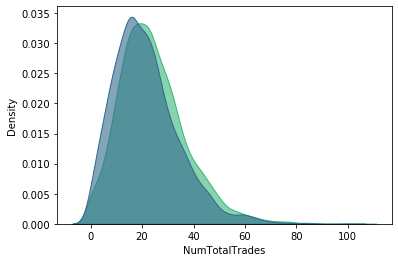

In [436]:
drawDensity('NumTotalTrades')

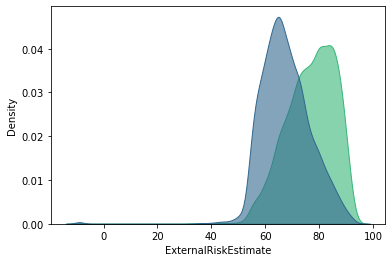

In [437]:
drawDensity('ExternalRiskEstimate')

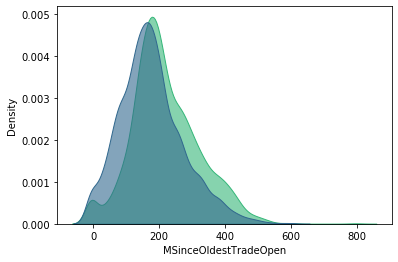

In [438]:
drawDensity('MSinceOldestTradeOpen')

##### We should take log of `MSinceMostRecentTradeOpen`

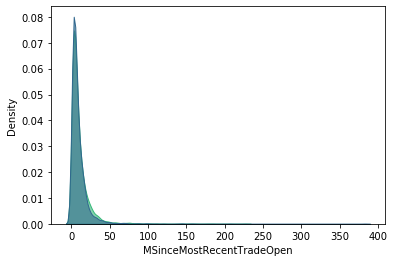

In [439]:
drawDensity('MSinceMostRecentTradeOpen')

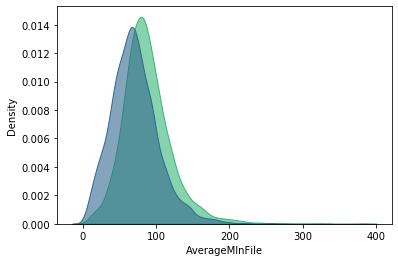

In [440]:
drawDensity('AverageMInFile')

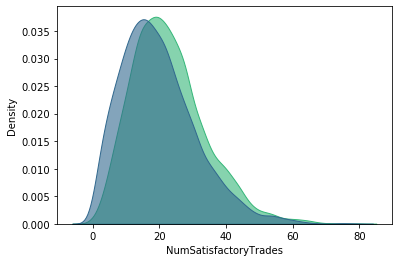

In [441]:
drawDensity('NumSatisfactoryTrades')

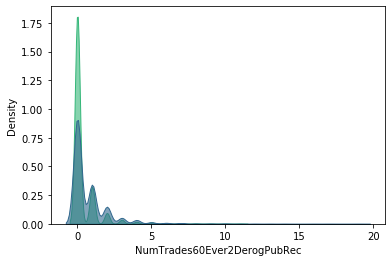

In [442]:
drawDensity('NumTrades60Ever2DerogPubRec')

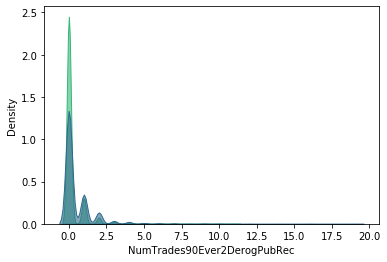

In [443]:
drawDensity('NumTrades90Ever2DerogPubRec')

##### Left-skewed `PercentTradesNeverDelq` -- Cube it

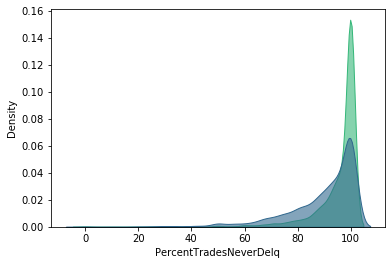

In [444]:
drawDensity('PercentTradesNeverDelq')

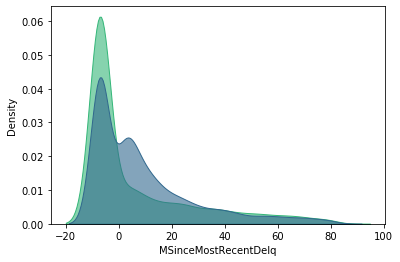

In [463]:
drawDensity('MSinceMostRecentDelq')

In [445]:
temp = np.power((df_without_missing_rows['PercentTradesNeverDelq']),7) 

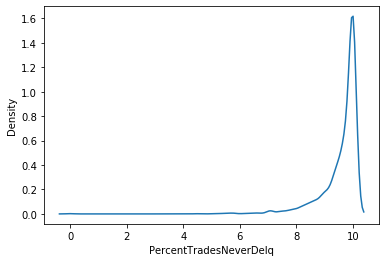

In [462]:
sns.kdeplot(X_train_t_tr['PercentTradesNeverDelq'])

C:\Users\13793\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


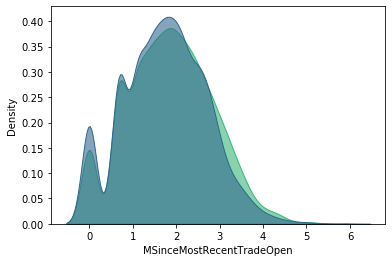

In [447]:

data = df_without_missing_rows.loc[:,['MSinceMostRecentTradeOpen', 'RiskPerformance']]
data['MSinceMostRecentTradeOpen'] = np.log(data['MSinceMostRecentTradeOpen'])
p = sns.kdeplot(data=data, x='MSinceMostRecentTradeOpen', hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.show()

C:\Users\13793\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


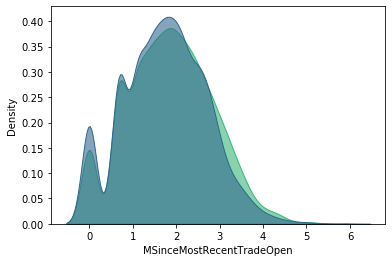

In [448]:
data = df_without_missing_rows.loc[:,['MSinceMostRecentTradeOpen', 'RiskPerformance']]
data['MSinceMostRecentTradeOpen'] = np.log(data['MSinceMostRecentTradeOpen'])
p = sns.kdeplot(data=data, x='MSinceMostRecentTradeOpen', hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.show()

In [449]:
for x in col_names:
    print(x)

RiskPerformance
ExternalRiskEstimate
MSinceOldestTradeOpen
MSinceMostRecentTradeOpen
AverageMInFile
NumSatisfactoryTrades
NumTrades60Ever2DerogPubRec
NumTrades90Ever2DerogPubRec
PercentTradesNeverDelq
MSinceMostRecentDelq
MaxDelq2PublicRecLast12M
MaxDelqEver
NumTotalTrades
NumTradesOpeninLast12M
PercentInstallTrades
MSinceMostRecentInqexcl7days
NumInqLast6M
NumInqLast6Mexcl7days
NetFractionRevolvingBurden
NetFractionInstallBurden
NumRevolvingTradesWBalance
NumInstallTradesWBalance
NumBank2NatlTradesWHighUtilization
PercentTradesWBalance


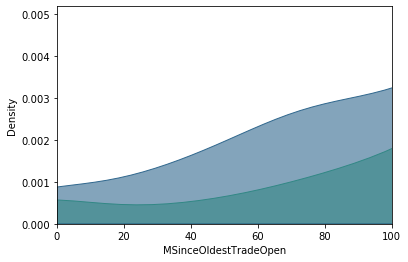

In [450]:
inputCol = 'MSinceOldestTradeOpen'
data = df_without_missing_rows.loc[:,[inputCol, 'RiskPerformance']]
p = sns.kdeplot(data=data, x=inputCol, hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.xlim(0, 100)
plt.show()

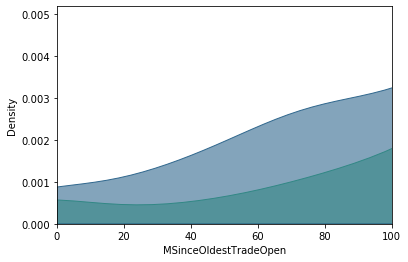

In [451]:
inputCol = 'MSinceOldestTradeOpen'
data = df_without_missing_rows.loc[:,[inputCol, 'RiskPerformance']]
p = sns.kdeplot(data=data, x=inputCol, hue="RiskPerformance", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.xlim(0, 100)
plt.show()

### Model Training

In [452]:
X_train_t_tr, X_train_t_val = train_test_split(X_train_t, test_size=0.25, random_state=1234)
Y_train_t_tr, Y_train_t_val = train_test_split(Y_train, test_size=0.25, random_state=1234)

In [453]:
X_train_t_tr.pop('NumTotalTrades')
X_train_t_val.pop('NumTotalTrades')
X_train_t_tr['MaxDelqEver'] = pd.Categorical(X_train_t_tr['MaxDelqEver'])
X_train_t_tr['MaxDelq2PublicRecLast12M'] = pd.Categorical(X_train_t_tr['MaxDelq2PublicRecLast12M'])
X_train_t_val['MaxDelqEver'] = pd.Categorical(X_train_t_val['MaxDelqEver'])
X_train_t_val['MaxDelq2PublicRecLast12M'] = pd.Categorical(X_train_t_val['MaxDelq2PublicRecLast12M'])

<ipython-input-453-1d74da18f2fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_tr['MaxDelqEver'] = pd.Categorical(X_train_t_tr['MaxDelqEver'])
<ipython-input-453-1d74da18f2fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_tr['MaxDelq2PublicRecLast12M'] = pd.Categorical(X_train_t_tr['MaxDelq2PublicRecLast12M'])
<ipython-input-453-1d74da18f2fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [454]:

X_train_t_tr['MSinceMostRecentTradeOpen'] = np.where(X_train_t_tr['MSinceMostRecentTradeOpen']<=0, 0,  np.log(X_train_t_tr['MSinceMostRecentTradeOpen']))
X_train_t_val['MSinceMostRecentTradeOpen'] = np.where(X_train_t_val['MSinceMostRecentTradeOpen']<=0, 0,  np.log(X_train_t_val['MSinceMostRecentTradeOpen']))

C:\Users\13793\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-454-d6e7726e3bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_tr['MSinceMostRecentTradeOpen'] = np.where(X_train_t_tr['MSinceMostRecentTradeOpen']<=0, 0,  np.log(X_train_t_tr['MSinceMostRecentTradeOpen']))
<ipython-input-454-d6e7726e3bd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [467]:
X_train_t_tr['PercentTradesNeverDelq'] = np.power((X_train_t_tr['PercentTradesNeverDelq']),1/2) 
X_train_t_val['PercentTradesNeverDelq'] = np.power((X_train_t_val['PercentTradesNeverDelq']),1/2) 

<ipython-input-467-6b1ba4d1a0a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_tr['PercentTradesNeverDelq'] = np.power((X_train_t_tr['PercentTradesNeverDelq']),3/2)
<ipython-input-467-6b1ba4d1a0a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_val['PercentTradesNeverDelq'] = np.power((X_train_t_val['PercentTradesNeverDelq']),3/2)


In [ ]:
MSinceMostRecentDelq

In [455]:
X_train_t_tr.replace([np.inf, -np.inf], np.nan)
X_train_t_tr.dropna(inplace=True)

<ipython-input-455-a1e4058eceaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_tr.dropna(inplace=True)


In [456]:
X_train_t_val.replace([np.inf, -np.inf], np.nan)
X_train_t_val.dropna(inplace=True)

<ipython-input-456-9d1733ddfe03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_t_val.dropna(inplace=True)


In [468]:
from sklearn import tree, linear_model, neighbors            
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

In [469]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Decision tree accuracy: 0.633
Logistic regression accuracy: 0.732
KNN accuracy: 0.659


#### cross-validation

In [270]:
X_train.dtypes

ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden                int64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance                int64
NumBank2NatlTradesWHighUtilization

In [355]:
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

In [356]:
from sklearn.model_selection import cross_validate
cv_results_tree = cross_validate(tree.DecisionTreeClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)


In [261]:
cv_results_tree

{'fit_time': array([0.16156673, 0.14660573, 0.13862801, 0.17455935, 0.15809178]),
 'score_time': array([0.00099754, 0.00299287, 0.0029974 , 0.00298691, 0.00199342]),
 'estimator': (DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
   

In [263]:
cv_results_tree['test_score']

array([0.65145754, 0.63244613, 0.63054499, 0.63918833, 0.6379201 ])

In [357]:
print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('KNN - CV accuracy score %.3f'%cv_results_knn['test_score'].mean()) # this is their average value

Classification tree - CV accuracy score 0.640
Logistic regresion - CV accuracy score 0.739
KNN - CV accuracy score 0.675


In [269]:
print('Classification tree - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regresion - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Classification tree - validation accuracy score: 0.632
Logistic regresion - validation accuracy score: 0.731
KNN - validation accuracy score: 0.669


## feature engineering and feature improtance


## how to choose a model  

1. accuracy -- confusion matrix (false psotive, false negative)  
2. easy to understand -- interpretatable & complexity
3. model fit -- overfitting or underfitting ?  
5. time, limitation of computational power  


--  Inference time